## About the dataset

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Objective: Build a classifier using KNN( K Nearest Neighbor)

In [ ]:
# Download and install packages load libraries

In [1]:
import piplite
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['scikit-learn'])
await piplite.install(['scipy'])

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing 
%matplotlib inline

In [9]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, 'wb') as f:
            f.write(await response.bytes())

### load in the CSV Data file 

In [16]:
path ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"

In [17]:
await download(path, 'teleCust1000t.csv')

In [18]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Data Visualtion and Analysis

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

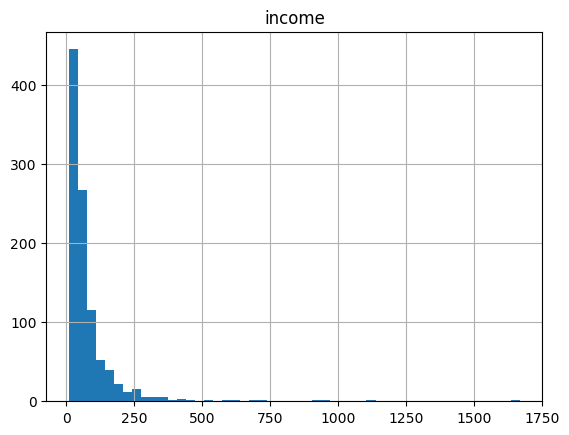

In [57]:
df['custcat'].value_counts()
df.hist(column = 'income', bins=50)

In [20]:
# defining future set. Let set X
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [22]:
# to use scikit-learn library. Convert the pandas library to a numpy array
X=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [23]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

### Train Test Split 

This splits the train and test data which are mutually exclusive. When I train the set Ill have to test the data set. This wiill provide a more accurate evalutation on out of sample accuracy.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


### Normalize the data

Data standaradization gives the data zero mean and unit variance, it is good espically for algorithms such as KNN which is based on the distance of data points.

In [26]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [28]:
X_train_norm = scaler.transform(X_train.astype(float))
X_train_norm[0:5]

array([[-1.28618818e+00, -1.53085556e+00, -8.49354628e-01,
         1.00752834e+00, -7.46393214e-01, -4.83608776e-01,
         1.12305195e+00, -7.02283455e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02,  2.51253999e-01,  3.44957012e-01,
         1.00752834e+00,  2.45326718e-01, -2.71543263e-01,
        -5.40728715e-01, -1.25385370e-04, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-1.28618818e+00, -7.80493639e-01, -6.90113076e-01,
         1.00752834e+00, -5.21892614e-02, -4.92444839e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02, -1.53085556e+00, -3.71629972e-01,
        -9.92527915e-01,  1.46154725e-01, -4.74772713e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
         9.90049504e-01, -9.33814526e-01],
       [ 1.19022709e+00, -2.17722200e-01, -6.10492300e-01,
        -9.92527915e-01, -2.50533248e-01,  2.40948394e-01,
  

### Classification
#### K nearest neighboor (KNN)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# train the data set lets start the algorithm with k=4 fro now.
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [32]:
X_test_norm = scaler.transform(X_test.astype(float))
X_test_norm[0:5]

array([[-1.28618818e+00, -9.68084119e-01, -9.28975404e-01,
         1.00752834e+00, -3.49705241e-01,  1.08407449e-01,
        -5.40728715e-01, -1.25385370e-04, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-1.28618818e+00, -1.48395794e+00, -1.32767644e-01,
        -9.92527915e-01,  4.69827318e-02, -3.51067830e-01,
        -5.40728715e-01, -6.01975159e-01, -2.23313158e-01,
        -1.01005050e+00, -9.33814526e-01],
       [-1.28618818e+00, -5.46005540e-01,  1.53926865e+00,
         1.00752834e+00, -5.48049227e-01,  3.02800836e-01,
         1.12305195e+00, -8.02591750e-01, -2.23313158e-01,
         9.90049504e-01,  1.14132887e+00],
       [-1.28618818e+00, -7.80493639e-01, -8.49354628e-01,
         1.00752834e+00, -1.14308119e+00, -4.92444839e-01,
         1.12305195e+00, -9.02900046e-01, -2.23313158e-01,
        -1.01005050e+00,  4.49614402e-01],
       [-1.28618818e+00,  4.85742098e-01, -1.00859618e+00,
         1.00752834e+00, -7.46393214e-01,  1.08407449e-01,
  

#### Predicting
 make predictions on the test set:

In [34]:
yhat = neigh.predict(X_test_norm)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [38]:
# now wea will go through the accuracy evaluation classification score 
from sklearn import metrics 
print('Train set Accuracy:', metrics.accuracy_score(y_train, neigh.predict(X_train_norm)))
print('Train set Accuracy:', metrics.accuracy_score(y_test, yhat))

Train set Accuracy: 0.5475
Train set Accuracy: 0.32


In [40]:
k=6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm, y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [41]:
X_test_norm=scaler.transform(X_test.astype(float))
X_test_norm[0:5]

array([[-1.28618818e+00, -9.68084119e-01, -9.28975404e-01,
         1.00752834e+00, -3.49705241e-01,  1.08407449e-01,
        -5.40728715e-01, -1.25385370e-04, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-1.28618818e+00, -1.48395794e+00, -1.32767644e-01,
        -9.92527915e-01,  4.69827318e-02, -3.51067830e-01,
        -5.40728715e-01, -6.01975159e-01, -2.23313158e-01,
        -1.01005050e+00, -9.33814526e-01],
       [-1.28618818e+00, -5.46005540e-01,  1.53926865e+00,
         1.00752834e+00, -5.48049227e-01,  3.02800836e-01,
         1.12305195e+00, -8.02591750e-01, -2.23313158e-01,
         9.90049504e-01,  1.14132887e+00],
       [-1.28618818e+00, -7.80493639e-01, -8.49354628e-01,
         1.00752834e+00, -1.14308119e+00, -4.92444839e-01,
         1.12305195e+00, -9.02900046e-01, -2.23313158e-01,
        -1.01005050e+00,  4.49614402e-01],
       [-1.28618818e+00,  4.85742098e-01, -1.00859618e+00,
         1.00752834e+00, -7.46393214e-01,  1.08407449e-01,
  

In [42]:
yhat =neigh.predict(X_test_norm)
yhat[0:5]

array([3, 3, 3, 4, 4], dtype=int64)

In [44]:
from sklearn import metrics
print('Train set Accuracy:', metrics.accuracy_score(y_train, neigh.predict(X_train_norm)))
print('Test se Accuracy:', metrics.accuracy_score(y_test, yhat))

Train set Accuracy: 0.5125
Test se Accuracy: 0.31


In [52]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_norm,y_train)
    yhat=neigh.predict(X_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

    
mean_acc
    

array([0.3  , 0.305, 0.315, 0.32 , 0.315, 0.31 , 0.33 , 0.325, 0.335])

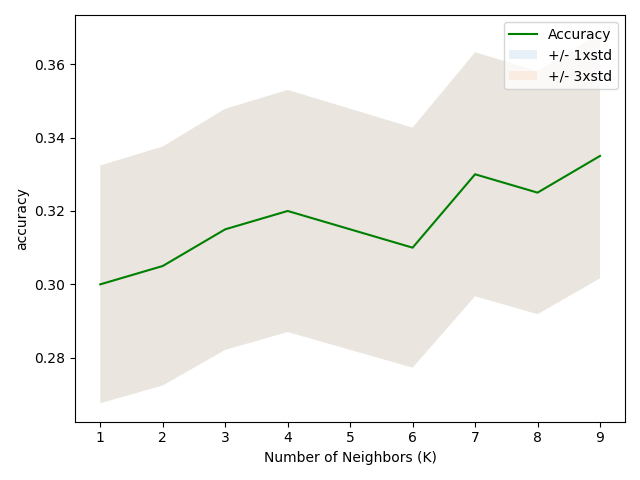

<Figure size 640x480 with 0 Axes>

In [54]:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=.10)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=.10)
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
                 